# Entropy

## Libraries

In [ ]:
import seaborn as sns 
import numpy as np
import math
import matplotlib.pyplot as plt
import unicodedata
import random
from scipy.stats import uniform,rice

## Functions

In [ ]:
#Joint
def joint(P):
  M = np.zeros((len(P),len(P)))

  for i in range(0,len(P)):
    for j in range(0,len(P)):
      M[i,j] = P[i]*P[j]
  
  return M

In [ ]:
def conditional(joi,prob):
  M = np.zeros((joi.shape))
  for i in range(0,len(joi)):
    for j in range(0,len(joi)):
      M[i,j] = joi[i,j]/prob[j]
  return M

In [ ]:
def jentropy(JP):
  M = np.zeros((len(JP),len(JP)))
  for i in range(0,len(JP)):
    for j in range(0,len(JP)):
      M[i,j] = -JP[i,j]*np.log2(JP[i,j])
      mt = np.sum(M)
  return M, mt

In [ ]:
def centropy(CP):
  M = np.zeros(len(CP))
  for i in range(0,len(CP)):
    M[i] = -CP[i,0]*np.log2(CP[i,0])
    mt = np.sum(M)
  return M, mt

In [ ]:
def Prob(List):
  M = np.zeros((len(List),3*len(List)))
  N = np.zeros((len(List),3*len(List)))
  for i in range(0,len(List)):
    for j in range(0,len(List)):
      histo, *_ = np.histogram2d(List[i],List[j], density=True)
      histo = histo/histo.sum()
      cond = histo/histo.sum(axis=0)
      if j == 0:
        M[i,j] = histo[0,0] # 1 Probabilidad de no aparicion
        M[i,j+1] = histo[-1,0] # 2 primer termino
        M[i,j+2] = histo[0,-1] # 3 segundo termino
        #---------------------------------------------------------------------#
        N[i,j] = cond[0,0] # 1 Probabilidad de no aparicion, 2 primer termino, 3 segundo termino
        N[i,j+1] = cond[-1,0] # 2 primer termino
        N[i,j+2] = cond[0,-1] # 3 segundo termino
      elif j != 0:
        j = j*3
        M[i,j] = histo[0,0] # 1 Probabilidad de no aparicion
        M[i,j+1] = histo[-1,0] # 2 primer termino
        M[i,j+2] = histo[0,-1] # 3 segundo termino
        #---------------------------------------------------------------------#
        N[i,j] = cond[0,0] # 1 Probabilidad de no aparicion, 2 primer termino, 3 segundo termino
        N[i,j+1] = cond[-1,0] # 2 primer termino
        N[i,j+2] = cond[0,-1] # 3 segundo termino
        j = j/3

  return M, N #M = conjunta, N = condicional

In [ ]:
def each(M):
  P0 = np.zeros((len(M),len(M)))
  P1 = np.zeros((len(M),len(M)))
  P2 = np.zeros((len(M),len(M)))

  w = np.arange(0,84,3)
  for i in range(0,len(M)):
    j=0
    for t in w:
      if j<len(M):
        P0[i,j] = M[i,t]
        j+=1

  w1 = np.arange(1,84,3)
  z = 0
  for x in range(0,len(M)):
    z = 0
    for y in w1:
      if z<len(M):
        P1[x,z] = M[x,y]
        z+=1
  
  w2 = np.arange(2,84,3)
  d = 0
  for o in range(0,len(M)):
    d = 0
    for p in w2:
      if d<len(M):
        P2[o,d] = M[o,p]
        d+=1

  return P0,P1,P2 #Probabilidad de no aparicion, P aparicion 1, P aparicion 2

In [ ]:
def nprob(Lista):
  PJ = np.zeros((len(Lista),len(Lista)))# crea arreglo 28 x 28 de ceros
  PC = np.zeros((len(Lista),len(Lista)))
  H = np.zeros((len(Lista),len(Lista)))
  for i in range(0,len(Lista)):
    for j in range(0,len(Lista)):
      his, _,_ = np.histogram2d(Lista[i], Lista[j], density=1)
      his = his/his.sum()
      k = his/his.sum(axis = 0) #Probabilidad Condicional
      
      PJ[i, j] = his[-1, 0]
      PC[i, j] = k[-1, 0]
      if i == j:
        PJ[i, j] = his[-1, -1]
        PC[i, j] = k[-1, -1]

      H[i,j] = -(PC[i,j]*np.log2(PC[i,j]))
      
  #PC[PC == 0] = 1
  return PJ,PC, H

In [ ]:
def sprob(Lista):
  PJ = np.zeros((len(Lista),len(Lista)))# crea arreglo 28 x 28 de ceros
  PC = np.zeros((len(Lista),len(Lista)))
  H = np.zeros((len(Lista),len(Lista)))
  for i in range(0,len(Lista)):
    for j in range(0,len(Lista)):
      his, _,_ = np.histogram2d(Lista[i], Lista[j], density=1)
      his = his/his.sum()
      k = his/his.sum(axis = 0) #Probabilidad Condicional
      
      PJ[i, j] = his[-1, 0]+his[0,-1]
      PC[i, j] = k[-1, 0]

      if i == j:
        PJ[i, j] = his[-1, -1]
        PC[i, j] = k[-1, -1]
      
      elif i == 1 or i == 24 or j == 1 or j == 24:
        PJ[i, j] = his[5, -1]
        PC[i, j] = k[5, -1]  

      elif (i == 1 and j == 24) or (i == 24 and j == 1):  
        PJ[i, j] = his[5, 5]
        PC[i, j] = k[5, 5]  
      
      H[i,j] = -(PC[i,j]*np.log2(PC[i,j]))

  #PC[PC == 0] = 1
  return PJ,PC,H

##English Text

Caracteres: [' ' '.' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


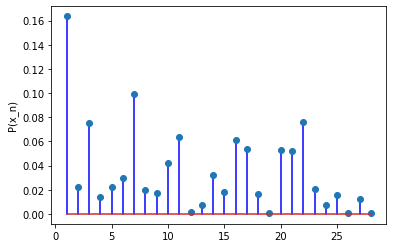

Entropy: 4.178084676264878


In [ ]:
with open("EnglishRead.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))
    

char, cnt = np.unique(a, return_counts=True)

x = np.linspace(1,len(cnt),len(cnt))

p = cnt/np.sum(cnt)

print('Caracteres:',char)

plt.stem(x,p, 'b')
plt.ylabel('P(x_n)')
plt.show()


H = -np.sum(p * np.log2(p))

prob = np.zeros(len(cnt))

for i in range(0,len(cnt)):
  prob[i] = cnt[i]/np.sum(cnt)

print('Entropy:',H)

#### Bigrama

In [ ]:
charList = [' ', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 
            'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
            'y', 'z']

mylist = []
i = 0
for char in charList:
  if i < 28:
    mylist.append([int(a == char) for a in string])
    i+=1

In [ ]:
Jpe,Cpe, H1 = nprob(mylist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


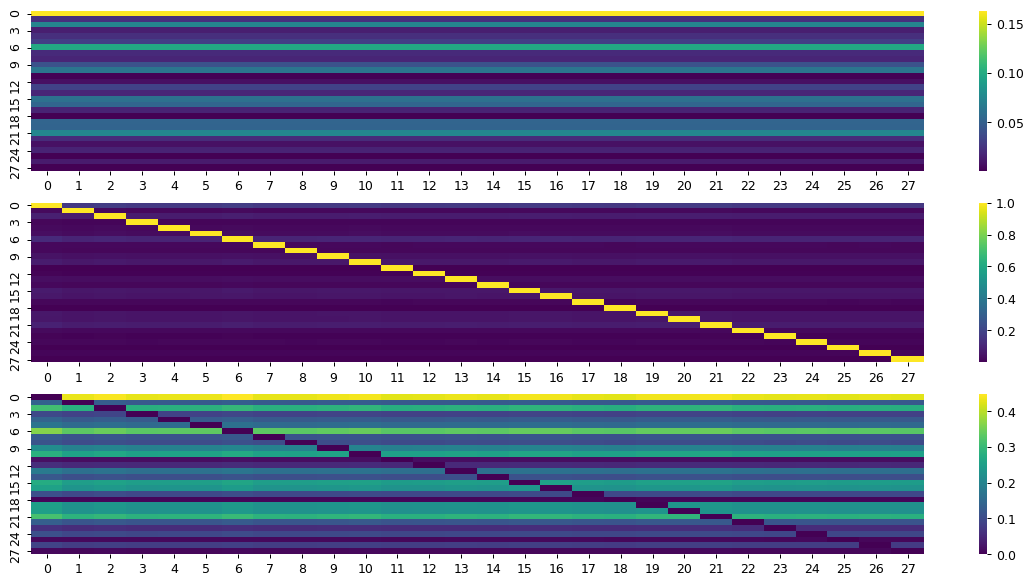

In [ ]:
#HeatMap
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_cpe = sns.heatmap(Jpe, cmap="viridis")
plt.subplot(312)
heat_map_cpe = sns.heatmap(Cpe, cmap="viridis")
plt.subplot(313)
heat_map_cpe = sns.heatmap(H1, cmap="viridis")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


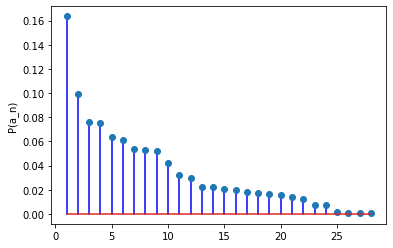

In [ ]:
#Reordered
p[::-1].sort() # P(a_n) rearrenged in decreasing order

jper = joint(p) #Joint Probability for english text
jeer, jeetr = jentropy(jper)

cper = conditional(jper,p) #Conditional Probability for english text
ceer, ceetr = centropy(cper)

plt.stem(x,p, 'b')
plt.ylabel('P(a_n)')
plt.show() 

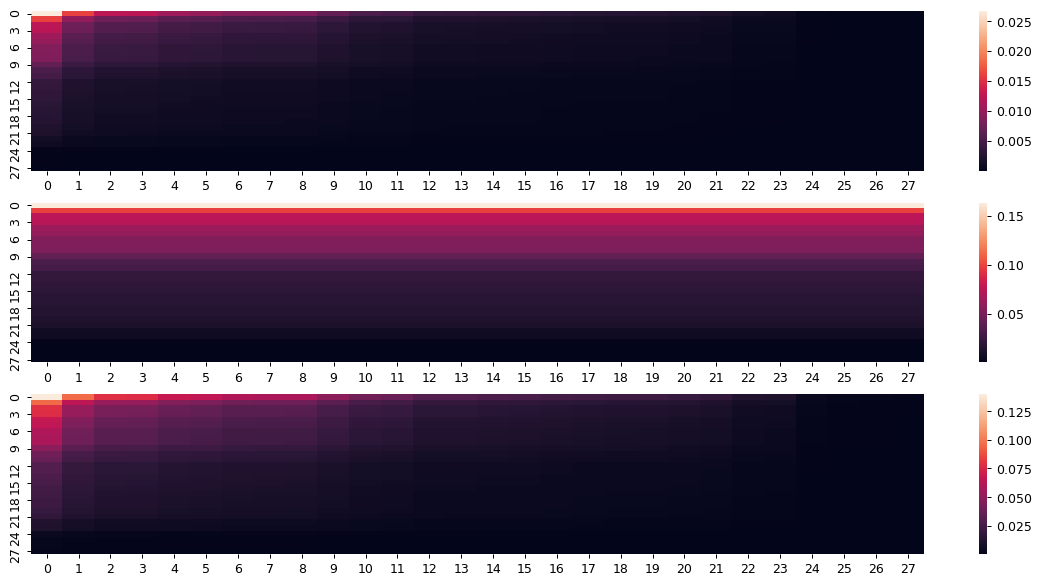

In [ ]:
#HeatMap
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jper)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cper)
plt.subplot(313)
heat_map_jee = sns.heatmap(jeer)

### Scrambling

Characters = 28 , [binary] Entropy= 4.178084676264878


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


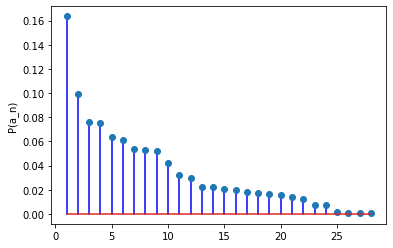

In [ ]:
with open("EnglishRead.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))

random.shuffle(a)
#a_scrambled = ''.join(a)
chars, ecnt = np.unique(a, return_counts=True)
ps = ecnt/np.sum(ecnt)

Hs = -np.sum(ps * np.log2(ps))

prob = np.zeros(len(ecnt))

for i in range(0,len(ecnt)):
  prob[i] = ecnt[i]/np.sum(ecnt)

ps[::-1].sort() # P(a_n) rearrenged in decreasing order

print('Characters =',len(ecnt),', [binary] Entropy=',Hs)

plt.stem(x,ps, 'b')
plt.ylabel('P(a_n)')
plt.show() 

#### Bigrama

In [ ]:
charList = [' ', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 
            'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
            'y', 'z']

mylist = []
i = 0
for char in charList:
  if i < 28:
    mylist.append([int(a == char) for a in string])
    i+=1

In [ ]:
Jpes,Cpes = Prob(mylist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
J01,J11,J21 = each(Jpes)
C01,C11,C21 = each(Cpes)

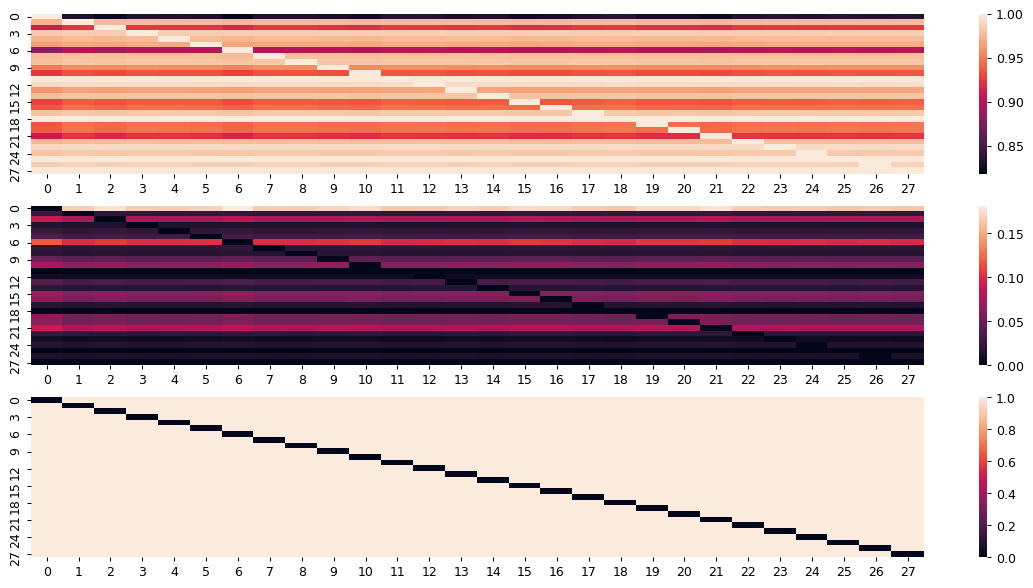

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(C01)
plt.subplot(312)
heat_map_cpe = sns.heatmap(C11)
plt.subplot(313)
heat_map_cpe = sns.heatmap(C21)

### English Text with No Punctiation

Caracteres: [' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


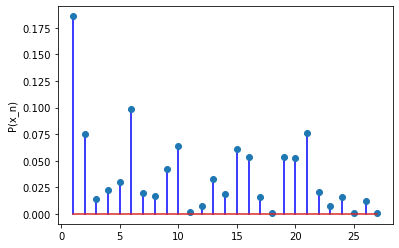

Entropy: 4.079812181862129


In [ ]:
with open("EnglishReadN.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))
    

char, cnt = np.unique(a, return_counts=True)

x = np.linspace(1,len(cnt),len(cnt))

p = cnt/np.sum(cnt)

print('Caracteres:',char)

plt.stem(x,p, 'b')
plt.ylabel('P(x_n)')
plt.show()


H = -np.sum(p * np.log2(p))

prob = np.zeros(len(cnt))

for i in range(0,len(cnt)):
  prob[i] = cnt[i]/np.sum(cnt)

print('Entropy:',H)

#### Bigrama

In [ ]:
charList = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 
            'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
            'y', 'z']

mylist = []
i = 0
for char in charList:
  if i < 27:
    mylist.append([int(a == char) for a in string])
    i+=1

In [ ]:
Jpen,Cpen, H2 = nprob(mylist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


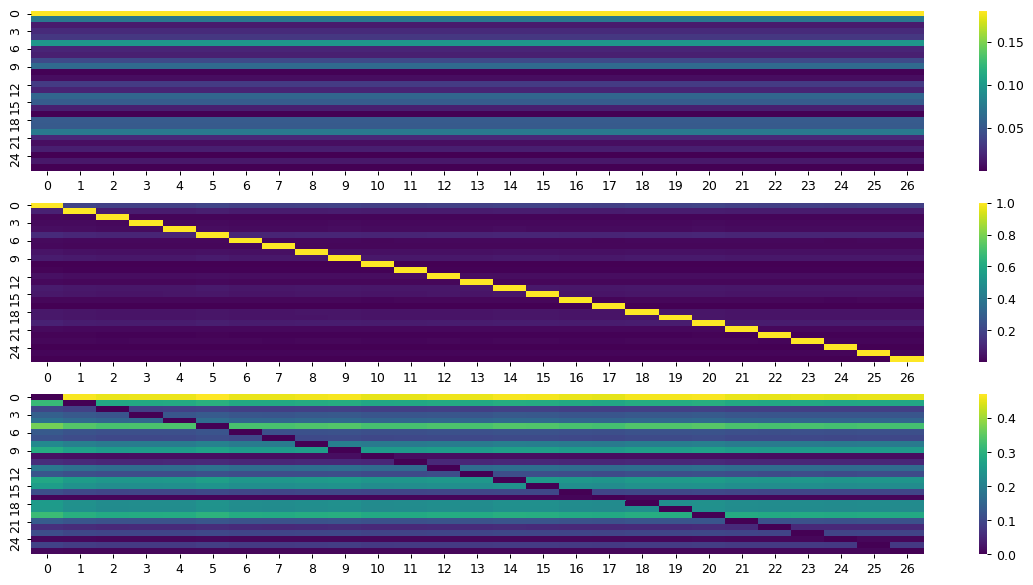

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(Jpen, cmap="viridis")
plt.subplot(312)
heat_map_cpe = sns.heatmap(Cpen, cmap="viridis")
plt.subplot(313)
heat_map_cpe = sns.heatmap(H2, cmap="viridis")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


<StemContainer object of 3 artists>

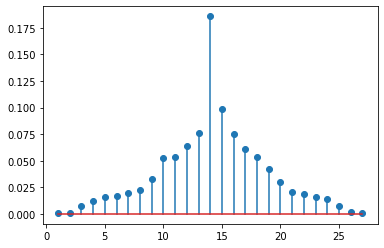

In [ ]:
n_p = np.zeros(len(p))
newp = p
n_p[13] = newp.max()
newp = newp[newp != newp.max()]
order = np.array([14,12,15,11,16,10,17,9,18,8,19,7,20,6,21,5,22,4,23,3,24,2,25,1,26,0])
for i in order:
    n_p[i] = newp.max()
    newp = newp[newp != newp.max()]

njpe = joint(n_p) #Joint Probability for english text
njee, njeet = jentropy(njpe)

ncpe = conditional(njpe,n_p) #Conditional Probability for english text
ncee, nceet = centropy(ncpe)

plt.stem(x,n_p)

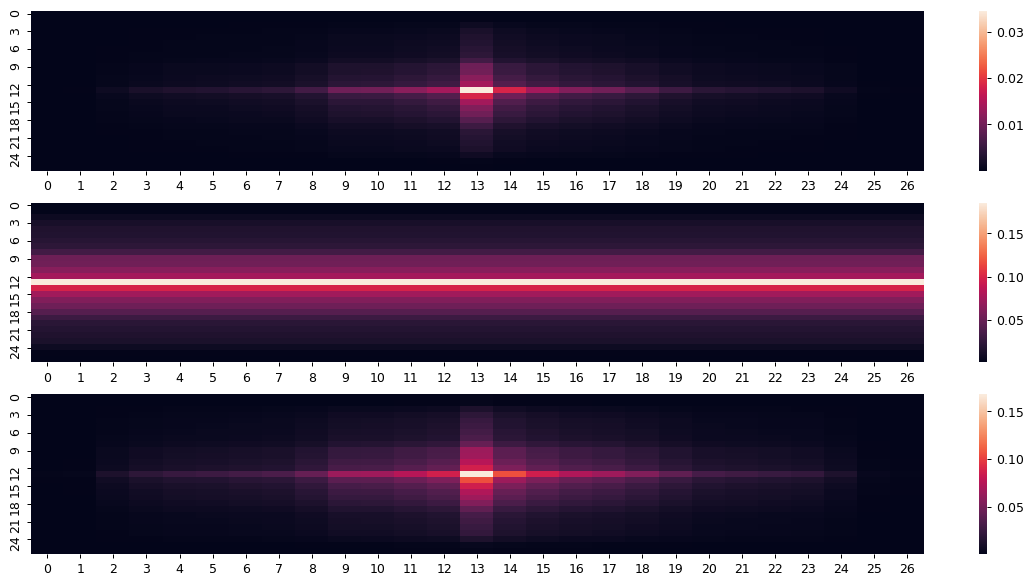

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(njpe)
plt.subplot(312)
heat_map_cpe = sns.heatmap(ncpe)
plt.subplot(313)
heat_map_jee = sns.heatmap(njee)

## Spanish Text

In [ ]:
with open("SpanishText.txt") as g:
    n_string = g.read()
    #n_string = unicodedata.normalize("NFKD", n_string)
    n_string = n_string.replace('\xad', '')
    n_string = n_string.replace('\n', '')
    n_a = np.array(list(n_string))
    

n_char, n_cnt = np.unique(n_a, return_counts=True)

x = np.linspace(1,len(n_cnt),len(n_cnt))

n_p = n_cnt/np.sum(n_cnt)

print('Caracteres:',n_char)

plt.stem(x,n_p, 'b')
plt.ylabel('P(x_n)')
plt.show()

n_H = -np.sum(n_p * np.log2(n_p))

prob = np.zeros(len(n_cnt))

for i in range(0,len(n_cnt)):
  prob[i] = n_cnt[i]/np.sum(n_cnt)

print('Entropy:',n_H)

FileNotFoundError: ignored

### Bigrama

In [ ]:
charList = [' ', '.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 
            'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 
            'z', 'ñ']

mylist = []
i = 0
for char in charList:
  if i < 28:
    mylist.append([int(a == char) for a in n_string])
    i+=1

In [ ]:
Jps,Cps, H3 = nprob(mylist)

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(Jps, cmap="viridis")
plt.subplot(312)
heat_map_cpe = sns.heatmap(Cps, cmap="viridis")
plt.subplot(313)
heat_map_cpe = sns.heatmap(H3, cmap="viridis")

In [ ]:
n_p[::-1].sort() # P(a_n) rearrenged in decreasing order
plt.stem(x,n_p, 'b')
plt.ylabel('P(a_n)')
plt.show() 

### Scrambling

In [ ]:
with open("SpanishText.txt") as g:
    n_string = g.read()
    #n_string = unicodedata.normalize("NFKD", n_string)
    n_string = n_string.replace('\xad', '')
    n_string = n_string.replace('\n', '')
    n_a = np.array(list(n_string))

random.shuffle(n_a)
#a_scrambled = ''.join(a)
n_chars, scnt = np.unique(n_a, return_counts=True)
ps = scnt/np.sum(scnt)

x = np.linspace(1,len(scnt),len(scnt))

Hs = -np.sum(ps * np.log2(ps))

prob = np.zeros(len(scnt))

for i in range(0,len(scnt)):
  prob[i] = scnt[i]/np.sum(scnt)

ps[::-1].sort() # P(a_n) rearrenged in decreasing order
plt.stem(x,ps, 'b')
plt.ylabel('P(a_n)')
plt.show() 

print('Characters =',len(scnt),', [binary] Entropy=',Hs)

### Spanish Text with No Punctuation

In [ ]:
with open("SpanishTextN.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))
    

char, cnt = np.unique(a, return_counts=True)

x = np.linspace(1,len(cnt),len(cnt))

p = cnt/np.sum(cnt)

print('Caracteres:',char)

plt.stem(x,p, 'b')
plt.ylabel('P(x_n)')
plt.show()


H = -np.sum(p * np.log2(p))

prob = np.zeros(len(cnt))

for i in range(0,len(cnt)):
  prob[i] = cnt[i]/np.sum(cnt)


print('Entropy:',H)

In [ ]:
n_p = np.zeros(len(p))
newp = p
n_p[13] = newp.max()
newp = newp[newp != newp.max()]
order = np.array([14,12,15,11,16,10,17,9,18,8,19,7,20,6,21,5,22,4,23,3,24,2,25,1,26,0])
for i in order:
    n_p[i] = newp.max()
    newp = newp[newp != newp.max()]

njps = joint(n_p) #Joint Probability for english text
njes, njest = jentropy(njps)

ncps = conditional(njps,n_p) #Conditional Probability for english text
nces, nceet = centropy(ncps)


plt.stem(x,n_p)

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(njps)
plt.subplot(312)
heat_map_cpe = sns.heatmap(ncps)
plt.subplot(313)
heat_map_jee = sns.heatmap(njes)